## PRiAD 5

# Uczenie nadzorowane

Ćwiczenie to jest poświęcone metodom **uczenia nadzorowanego** (ang. supervised learning). Zostaną w nim pokazane wybrane metody klasyfikacji i regresji.

**Klasyfikacją** nazywamy proces określenia przynależności obiektów do określonych kategorii (klas). Klasyfikacja odbywa się poprzez wykorzystanie *klasyfikatora*, czyli algorytmu realizującego klasyfikację, oraz *zbioru uczącego*, na którego podstawie odbywa się klasyfikacja.

<br>

**Zbiór uczący** jest macierzą danych składającą się ze sklasyfikowanych obiektów. Obiekty te opisane są *atrybutami opisującymi*, czyli cechami, oraz kategorycznym **atrybutem decyzyjnym**, inaczej zmienną celu. Atrybut decyzyjny określa  klasę do której należy dany obiekt. 

<br>

Zakłada się, że pomiędzy atrybutem decyzyjnym a atrybutami opisującymi zachodzi związek przyczynowo-skutkowy. Wówczas zbiór danych można traktować jako źródło wiedzy na temat klas, na podstawie którego możemy określić rodzaj klasyfikatora oraz dobrać odpowiednie parametry w **procesie uczenia** modelu klasyfikatora. Poprawnie nauczony model można następnie wykorzystać do określenia przynależności nowego obiektu do właściwej klasy na podstawie wartości atrybutów opisujących tego obiektu.

<br>

Mówiąc prościej - wykorzystujemy pewien znany zbiór danych, którego elementy mają atrybuty opisujące i atrybut decyzyjny (przynależność do klasy), w celu stworzenia modelu który określi nam w jakiej klasie powinien znajdować się nowy element, na podstawie atrybutów opisujących tego nowego elementu.

<br>

Algorytm uczenia maszynowego nie powinien tylko i wyłącznie powtarzać schematy dla danemu mu zbiorowi uczącemu, ale również ma umieć uogólnić wyniki dla innych obserwacji (innych danych). Najprostszą i najczęstszą metodą sprawdzenia poprawności działania opracowanego modelu pod tym kątem jest wyodrębnienie tzw. *zbioru testowego* ze zbioru uczącego, który nie bierze udziału w procesie uczenia modelu. Porównując (np. macierzą błędów) wartości atrybutów decyzyjnych znanych dla zbioru testowego z tymi, które zaproponował klasyfikator, jesteśmy w stanie ocenić jego skuteczność. Najczęściej dooknuje się podziału zbioru danych w proporcjach 70/30 lub 80/20. Dodatkową, częstą praktyką jest wyodrębnienie zbioru walidacyjnego, który z kolei pomaga wstępnie przygotować parametry wykorzystywanych klasyfikatorów aby mogły poradzić sobie z procesem dopasowania do posiadanych danych.

<br>

W ćwiczeniu pokazane zostaną następujące metody klasyfikacji:
1. Metoda najbliżego sąsiada 
2. Metoda k-najbliższych sąsiadów
3. Metoda najbliższego prototypu
4. Naiwny klasyfikatory Bayesa
5. Drzewa decyzyjne

<br>

**Regresja** to sposób na oszacowanie zależności między korelacją danych atrybutów obiektu. Innymi słowy, efektem regresji jest estymat wartości atrybutu na podstawie innego lub innych atrbytów skorelowanych z nim. W przypadku regresji wartością wyjściową/atrybutem decyzyjnym opracowywanego przez nas modelu jest wartość będąca ciągłą wartością numeryczną (jest wielkością liczbową). W punkcie 6 ćwiczenia zostanie zostanie pokazany prosty modeli regresji liniowej. 

Na początek jednak, tradycyjnie, zostaną wczytane niezbędne pakiety. <br>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree
from math import ceil

from seaborn import load_dataset

Spójrzmy na zbiory danych, które zostały wykorzystane w tym skrypcie. Różne kolory punktów na wykresie przedstawiają poszczególne klasy.

Zbiory (z wyjątkiem `iris`) posiadają dwie cechy - atrybut1 i atrybut2:

In [3]:
# metoda pomagająca prezentować zbiory, żeby nie powtarzać kodu:

def showData(dane):
    plt.figure(figsize=(12,12))
    plt.subplot(2,2,1)
    plt.title("Bez wyróżnienia klas")
    plt.scatter(dane.loc[:, 'atrybut1'], dane.loc[:, 'atrybut2'], marker = '.')
    plt.subplot(2,2,2)
    plt.title("Z wyróżnieniem klas")
    plt.scatter(dane.loc[:, 'atrybut1'], dane.loc[:, 'atrybut2'], c=dane["klasa"].astype('category').cat.codes, marker = '.')

`dane1.csv`:

   atrybut1  atrybut2    klasa
0        86        43  klasa 3
1        79        50  klasa 3
2        73        49  klasa 3
3        69        49  klasa 3
4        74        43  klasa 3
5        83        25  klasa 3
6        87        27  klasa 3
7        84        20  klasa 3
8        84        39  klasa 3
9        81        43  klasa 3


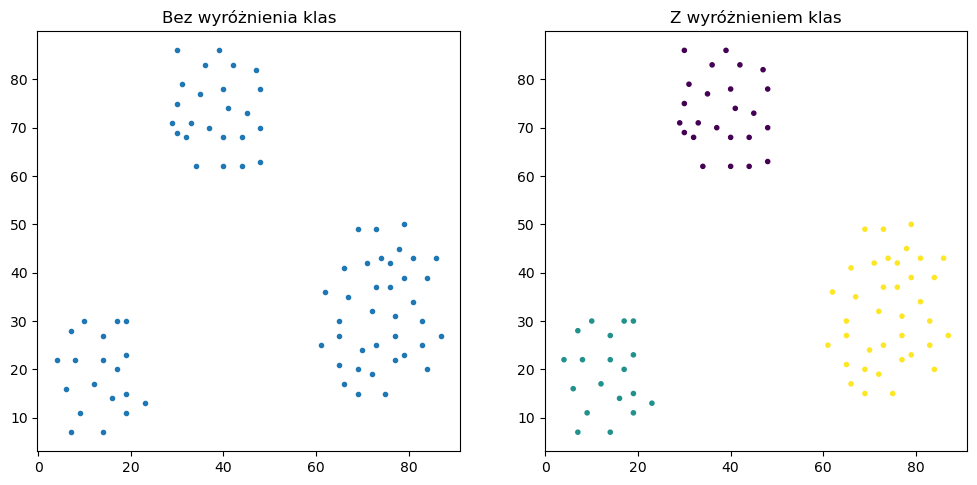

In [4]:
dane1 = pd.read_csv('dane1.csv')
print(dane1.head(10))
showData(dane1)

Zbiór `dane1` jest bardzo prosty i wyraźnie podzielony na 3 klasy - w tym przypadku, z uwagi na rozmieszczenie danych,  bylibyśmy w stanie otrzymać relatywnie dobry klasyfikator stosując uczenie nienadzorowane przed nadzorowanym.

`dane2.csv`:

   atrybut1  atrybut2    klasa
0        66        76  klasa 3
1        30         5  klasa 3
2        77        76  klasa 1
3        25        89  klasa 1
4        33        92  klasa 1
5        64        92  klasa 1
6        48        60  klasa 1
7        56        68  klasa 1
8        34        58  klasa 1
9        22        64  klasa 1


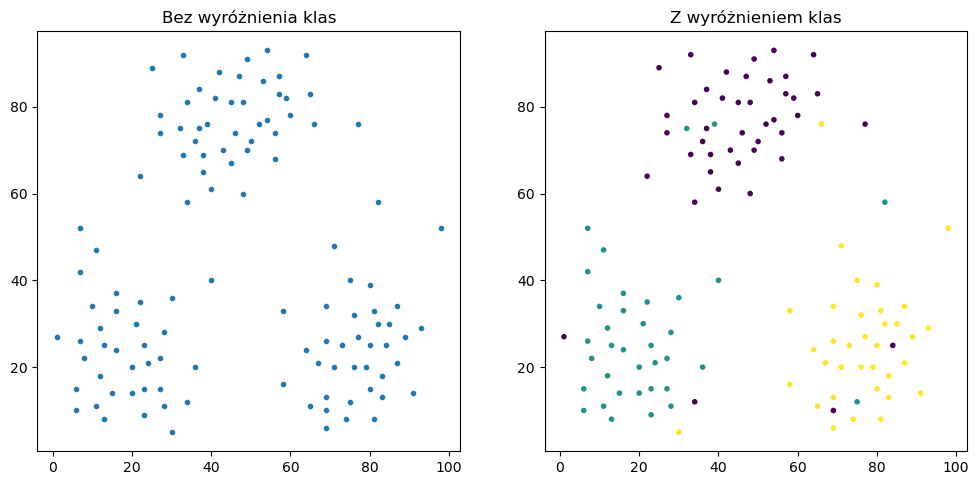

In [5]:
dane2 = pd.read_csv('dane2.csv')
print(dane2.head(10))
showData(dane2)

Tutaj już powoli zaczynają się schodki - występują elementy odstające od klastrów swoich klas, mieszające się z klastrami innych klas.

`dane3.csv`:

   atrybut1  atrybut2    klasa
0        66        26  klasa 1
1        86        63  klasa 2
2        67        75  klasa 2
3        63        76  klasa 2
4        57        77  klasa 2
5        29         4  klasa 3
6        94        20  klasa 3
7        90        32  klasa 3
8        86        48  klasa 3
9        92        60  klasa 3


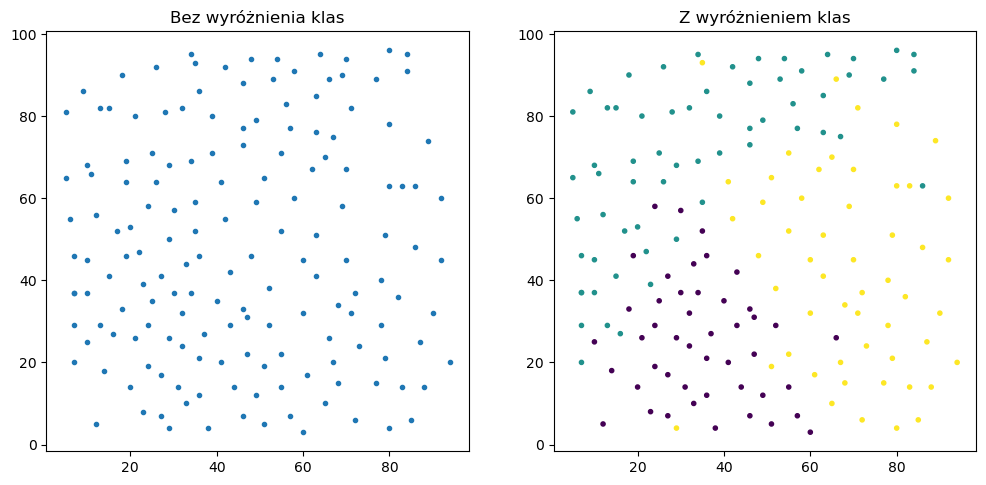

In [6]:
dane3 = pd.read_csv('dane3.csv')
print(dane3.head(10))
showData(dane3)

Tutaj mamy już poważny problem - bez znanego podziału podziału na klasy trudno byłoby poprawnie je określić metodami uczenia nienadzorowanego, co dopiero przyporządkować nowy element.

`dane10`:

   atrybut1  atrybut2    klasa
0        61        31  klasa 3
1        66        18  klasa 3
2        69        14  klasa 3
3        72         2  klasa 3
4        62        -3  klasa 3
5        62         3  klasa 3
6        59        -1  klasa 3
7        55         8  klasa 3
8        52         7  klasa 3
9        48        10  klasa 3


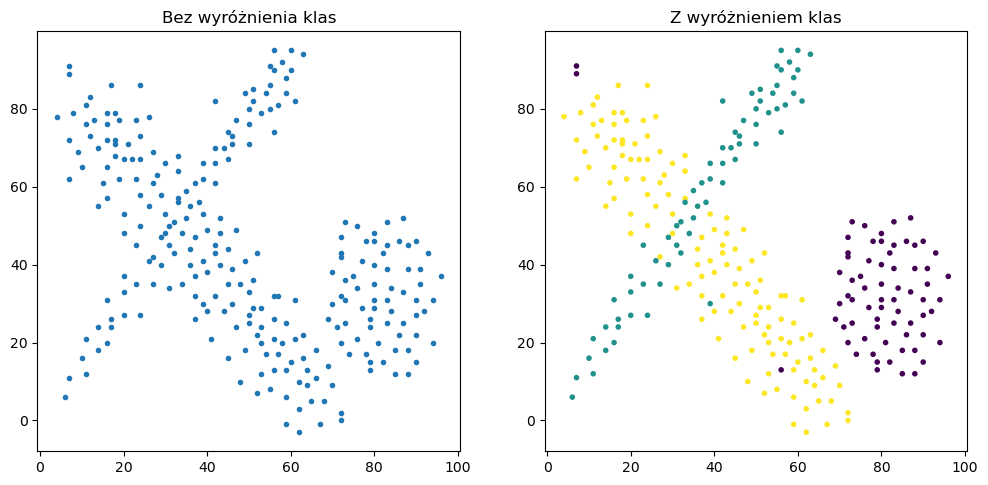

In [7]:
dane10 = pd.read_csv('dane10.csv')
print(dane10.head(10))
showData(dane10)

Tutaj największym problemem dla uczenia nienadzorowanego jest złączenie się dwóch prostych (środek X).

Jak widać z powyższych wykresów, dane które otrzymujemy mogą być różne. Natomiast, jesteśmy w stanie wyznaczyć na ich podstawie klasyfikator, gdyż znamy przynależność obiektów w zbiorach do poszczególnych, przeszukiwanych klas. Bez tej wartości, uczenie nadzorowane nie miałoby sensu.

`irys`:

G:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


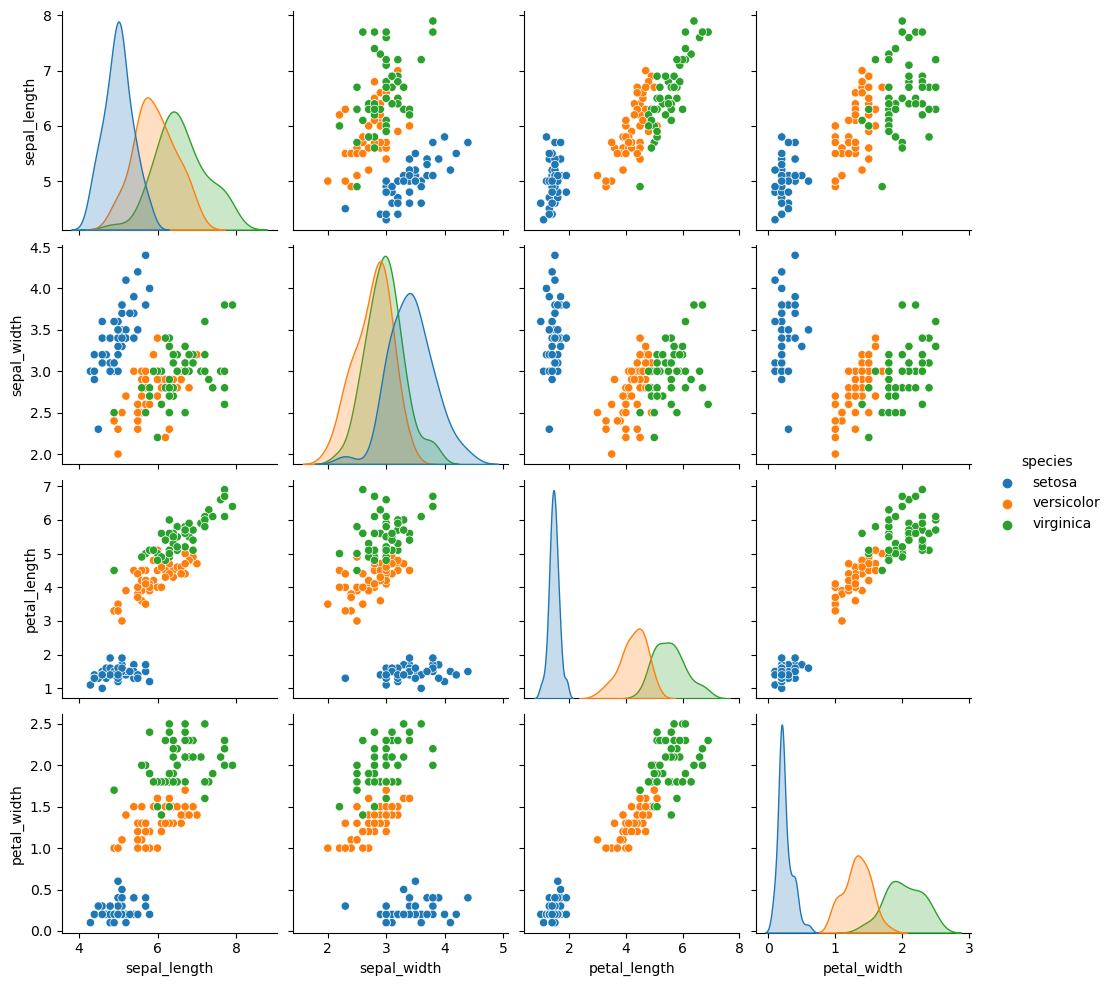

<Axes: >

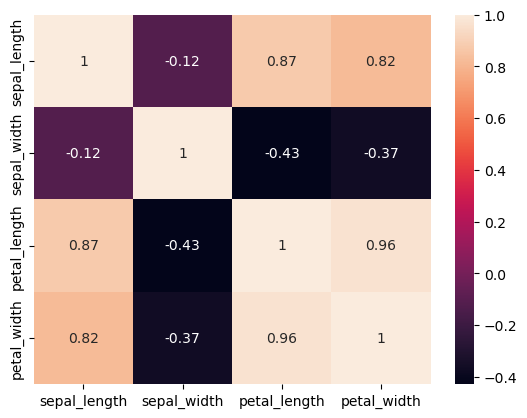

In [8]:
iris = load_dataset("iris")
iris.head()
sns.pairplot(iris, kind="scatter", hue = "species")
plt.show()
iris_ns = iris.drop(columns = ["species"])
sns.heatmap(iris_ns.corr(),annot = iris_ns.corr())

Na potrzeby skryptu, `irys` będzie naszym jedynym zbiorem z większą liczbą cech - wykorzystamy go do badania regresji. 
Jak widać z powyższych wykresów, nie każda para atrybutów jest ze sobą skorelowana tak samo.

## 1. Klasyfikator najbliższego sąsiada

Zwany również klasyfikatorem minimalnoodległościowym, jest to bardzo prosty klasyfikator. A mianowicie, poszukuje on najbliższego sąsiada dla nowego obiektu o nieznanej klasie, wśród obiektów znajdujących się w zbiorze uczącym. Klasa, do której najbliższy sąsiad przynależy jest przypisywana klasyfikowanemu obiektowi. 

Poniższy przykład pokazuje wyszukiwanie najbliższych sąsiadów.

> **Pytanie** Czy relacja "x jest najbliższym sąsiadem y" zawsze jest symetryczna? Zastanów się czy tak jest, uzasadnij.

Jak wspomniano we wstępie, dla sprawdzenia działania (każdego) klasyfikatora należy podzielić zbiór danych na uczący i testowy. W tym celu wykorzystamy się funkcję `train_test_split`. Funkcja ta zarówno na wejściu jak i na wyjściu wymaga podania osobno atrybutów opisujących i atrybutu decyzyjnego. Dla ułatwienia przygotowana została funkcja realizująca podział zbioru i zapisująca zbiór uczący i testowy w jednej strukturze (słowniku).

Istnieją oczywiście inne sposoby podziału, np. KFold (w sklearn.model_selection), jednak w tym skrypcie ich działanie nie zostanie zademonstrowane.

In [9]:
def podziel(df,proporcja):
    # dzieli macierz (ramkę) danych na zbiór uczacy i testowy
    # df - ramka danych; proporcja - proporcja podzialu (0-1)
    
    # zwraca słownik z kluczami:
    # opis_ucz/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
    # dec_ucz/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego
    # uwaga: atrybut opisujący jest zawsze na końcu (ostatnia kolumna ramki)
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}


In [10]:
dane = podziel(dane1,0.3)
print('Liczba obiektów zbioru uczącego: ', len(dane["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(dane["opis_test"]))

Liczba obiektów zbioru uczącego:  56
Liczba obiektów zbioru testowego:  24


<br><br>Teraz zostanie stworzony model klasyfikatora najbliższego sąsiada za pomocą funkcji `KNeighborsClassifier`. Parametr *n_neighbors* określa ile sąsiadów ma być brane pod uwagę w klasyfikacji - aktualnie 1. 

In [11]:
model = KNeighborsClassifier(n_neighbors = 1)

Aby ocenić jakość klasyfikacji wykorzystamy macierz pomyłek (tabelę krzyżową/macierz kontygencji). Macierz ta składa się z liczb obiektów przypisanych do klas przez wybrany model klasyfikatora, dla poszczególnych wartości atrybutu decyzyjnego. 

Innymi słowy, kolumny i wiersze zawierają wartości klas, a liczba w danej komórce macierzy jest równa liczbie obiektów które:
* powinny były być przypisane do klasy w wierszu
* zostały przypisane do klasy w kolumnie

Dla usprawnienia, procedura `weryfikuj` wyświetla macierze pomyłek dla zbioru uczącego i testowego.

In [12]:
def weryfikuj(model,dane,atryb):
    # wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
    # dla zbioru uczącego i testowego
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atryb - lista atrybutów uwzględnianych w weryfikacji
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    mp = confusion_matrix(dane["dec_ucz"],wynik_ucz)
    print("macierz pomyłek - zbiór uczący, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    print(model.score(dane['opis_ucz'],dane['dec_ucz']))
    print(mp)
    mp = confusion_matrix(dane["dec_test"],wynik_test)
    print("macierz pomyłek - zbiór testowy, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    print(model.score(dane['opis_test'],dane['dec_test']))
    print(mp) 

Mając te narzędzia, w celu zbadania klasyfikatora wykonujemy:

G:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


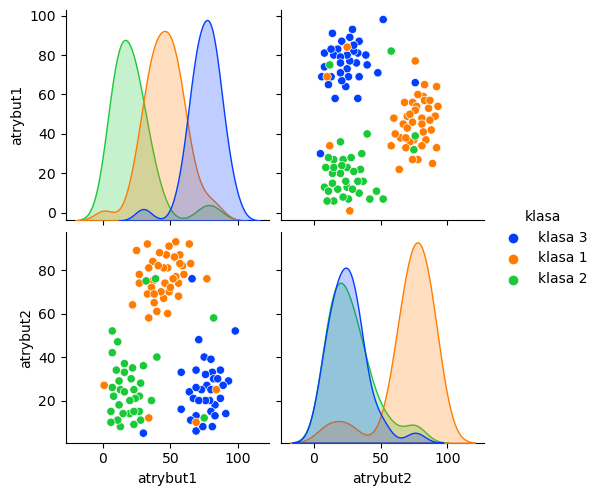

macierz pomyłek - zbiór uczący, dokładność: 1.0
1.0
[[28  0  0]
 [ 0 27  0]
 [ 0  0 24]]
macierz pomyłek - zbiór testowy, dokładność: 0.8
0.8
[[12  2  1]
 [ 0  8  1]
 [ 2  1  8]]


In [13]:
sns.pairplot(dane2, kind="scatter", hue = "klasa", palette="bright")
plt.show()

# podział zbioru danych
dane = podziel(dane2,0.3)
# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=1)
# weryfikacja
weryfikuj(model,dane,[0,1])

Jak widzimy, zbiór uczący posiada pełną dokładność (sam ze sobą jest równy). Zbiór testowy natomiast ma pewne błędy, mianowicie dla tych obiektów, które znajdują się w klastrach innych klas - o ile da się otrzymać 100% dokładność dla pewnych zbiorów danych, często nie jest to możliwe. Dokładność rzędu 80% nie jest zła.
 
 

W celu lepszej wizualizacji podziału na wykresie, co znacznie ułatwia analizę klasyfikatora, można wykorzystać **granice decyzyjne**. Są to linie oddzielające obszary przestrzeni atrybutów, które odpowiadają poszczególnym klasom. Sposób podziału tej przestrzeni zależy od rodzaju klasyfikatora. 

Z uwagi na dwuwymiarowość granic, w przypadku większej liczby atrybutów należy wybrać dwa z nich i na ich podstawie wyznaczyć granice.

Dla ułatwienia zostały stworzone procedury `rysujGranice` oraz `granice`. Pierwsza z nich wyznacza atrybuty dla funkcji `plt.contourf`, która na ich podstawie wyświetla granice decyzyjne na wykresie oraz oddzielane przez nie 'sektory', a druga - rysuje wykresy według specyfikacji. Warto zaznaczyć, że na wykresie wyjściowym, dane zastosowane w zbiorze uczącym są oznaczone kropką, a w zbiorze testowym - iksem.

Procedura `granice` może być wykorzystana bez `rysujGranice`, dla wartości kontur = 0 - wtedy zostanie wyświetlony tylko wykres danych.

In [49]:
def rysujGranice(model, dane, atr_x, atr_y):
    # metoda wyznaczająca trzy macierze - xx, yy, zz - z wartościami na podstawie których
    # funkcja plt.contourf wyznacza granice decyzyjne

    x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
    x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
    y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
    y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
    rozst_x = x_max - x_min
    rozst_y = y_max - y_min
    x_min = x_min - 0.1*rozst_x
    x_max = x_max + 0.1*rozst_x
    y_min = y_min - 0.1*rozst_y
    y_max = y_max + 0.1*rozst_y       
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                 np.arange(y_min, y_max, (y_max-y_min)/150))
    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    return [xx, yy, zz]


def granice(model,dane,atr_x, atr_y,tytul, kontur = 1):
    # wyświetla granice decyzyjne
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atr_x/atr_y - artybut wyswietlany na osi x/y
    # tytul - wyświetlany tytuł wykresu
    # kontur - par. opcjonalny (=0 -> brak konturu)
    model.fit(dane["opis_ucz"].iloc[:,[atr_x,atr_y]], dane["dec_ucz"])
    plt.title(tytul)
    if (kontur == 1):
        xyz = rysujGranice(model, dane, atr_x, atr_y)
        plt.contourf(xyz[0], xyz[1], xyz[2], levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')

Wykresy do analizy klasyfikatora:

G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


macierz pomyłek - zbiór uczący, dokładność: 1.0
1.0
[[33  0  0]
 [ 0 26  0]
 [ 0  0 20]]
macierz pomyłek - zbiór testowy, dokładność: 0.8571428571428571
0.8571428571428571
[[ 8  1  1]
 [ 1  9  0]
 [ 0  2 13]]


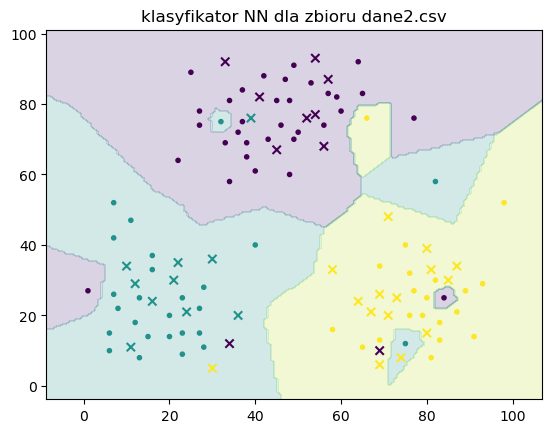

In [50]:
# podział zbioru danych
d = podziel(dane2,0.3)

# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=1)

# wybór atrybutów
ax, ay = 0,1

# granice dycyzyjne
granice(model,d,ax,ay,"klasyfikator NN dla zbioru dane2.csv")

# weryfikacja
weryfikuj(model,d,[ax,ay])

>**Pytanie** Czy każde wywołanie powyższego kodu da taki sam wykres? Uzasadnij dlaczego tak jest, lub nie jest?

> **Zadanie** Czy wyniki dla zbioru `dane2` są lepsze czy gorsze niż dla `dane1`? Zastanów się, dlaczego?

In [16]:
# miejsce na kod

> **Zadanie** Poeksperymentuj w analogiczny sposób z pozostałymi macierzami `dane` (nie tylko tymi przedstawionymi we wstępie), w tym także ze zbiorem `iris`. Oceń przydatność klasyfikatora dla każdego zbioru danych.

In [17]:
# miejsce na kod

## 2. Klasyfikator *k*-najbliższych sąsiadów (k-NN)

Klasyfikator k-najbliższych sąsiadów to uogólnienie klasyfikatora najbliższego sąsiada. W tym przypadku, zamiast klasyfikować obikt na podstawie jednego najbliższego sąsiada, poszukiwanych jest *k* takich sąsiadów. Klasa wynikowa odpowiada tej klasie, która występuje najwięcej razy w zbiorze sąsiadów.

> **Zadanie** Jak zwiększenie liczby sąsiadów wpłynie na wynik klasyfikacji zbioru `dane2`? Dlaczego tak się dzieje?

In [18]:
# miejsce na kod

W celu lepszej wizualizacji zmian zachodzących dla różnych liczb sąsiadów, zmodyfikujemy lekko funkcję `granice`. Podstawa działania jest analogiczna, zmieniono jedynie wyświetlanie:

In [53]:
def granice_dla_KNN(dane,atr_x, atr_y, liczba_sub, wart_zmienne, nazwa_pliku, kontur = 1):
    plt.figure(figsize=(15,15))
    j = 0
    ls = int(ceil(liczba_sub/2))
    for i in wart_zmienne:
        model = KNeighborsClassifier(n_neighbors = i)
        model.fit(dane["opis_ucz"].iloc[:,[atr_x,atr_y]], dane["dec_ucz"])
        plt.subplot(ls, 2, j+1)
        j+=1
        plt.title("Klasyfikator " + str(i)+ "-NN dla zbioru " + nazwa_pliku)
        if (kontur == 1):
            xyz = rysujGranice(model, dane, atr_x, atr_y)
            plt.contourf(xyz[0], xyz[1], xyz[2], levels = 4, alpha=0.2)
        plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
        plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')

Poniżej zamieszczono analizę wpływu liczby *k* na wynik klasyfikacji dla zbioru `dane3` oraz `dane10`.

G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

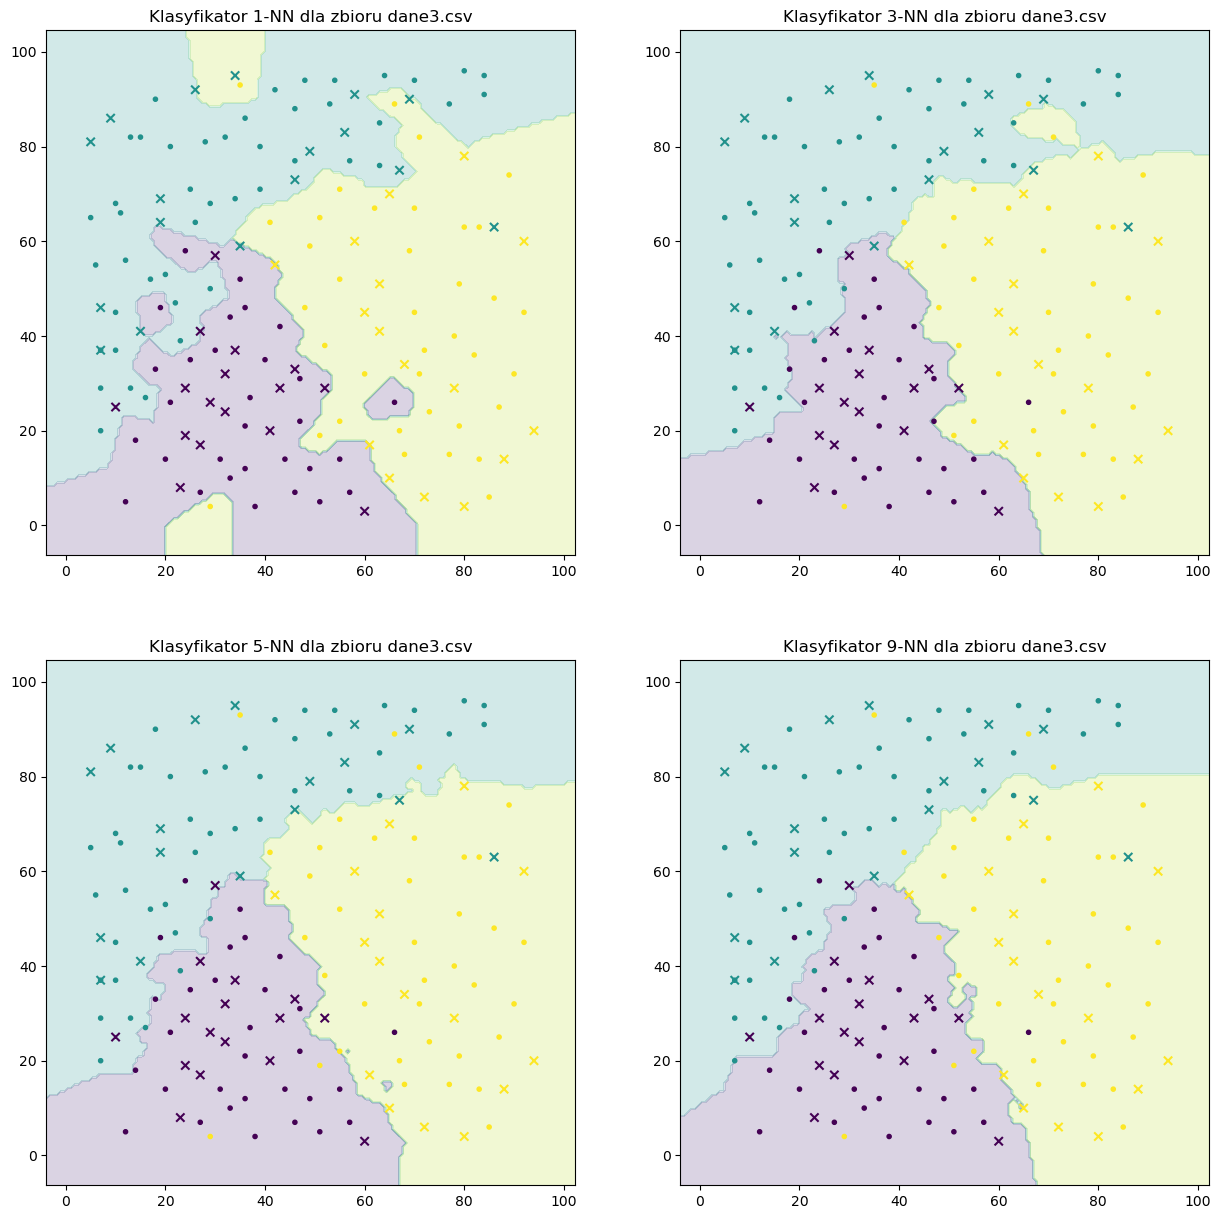

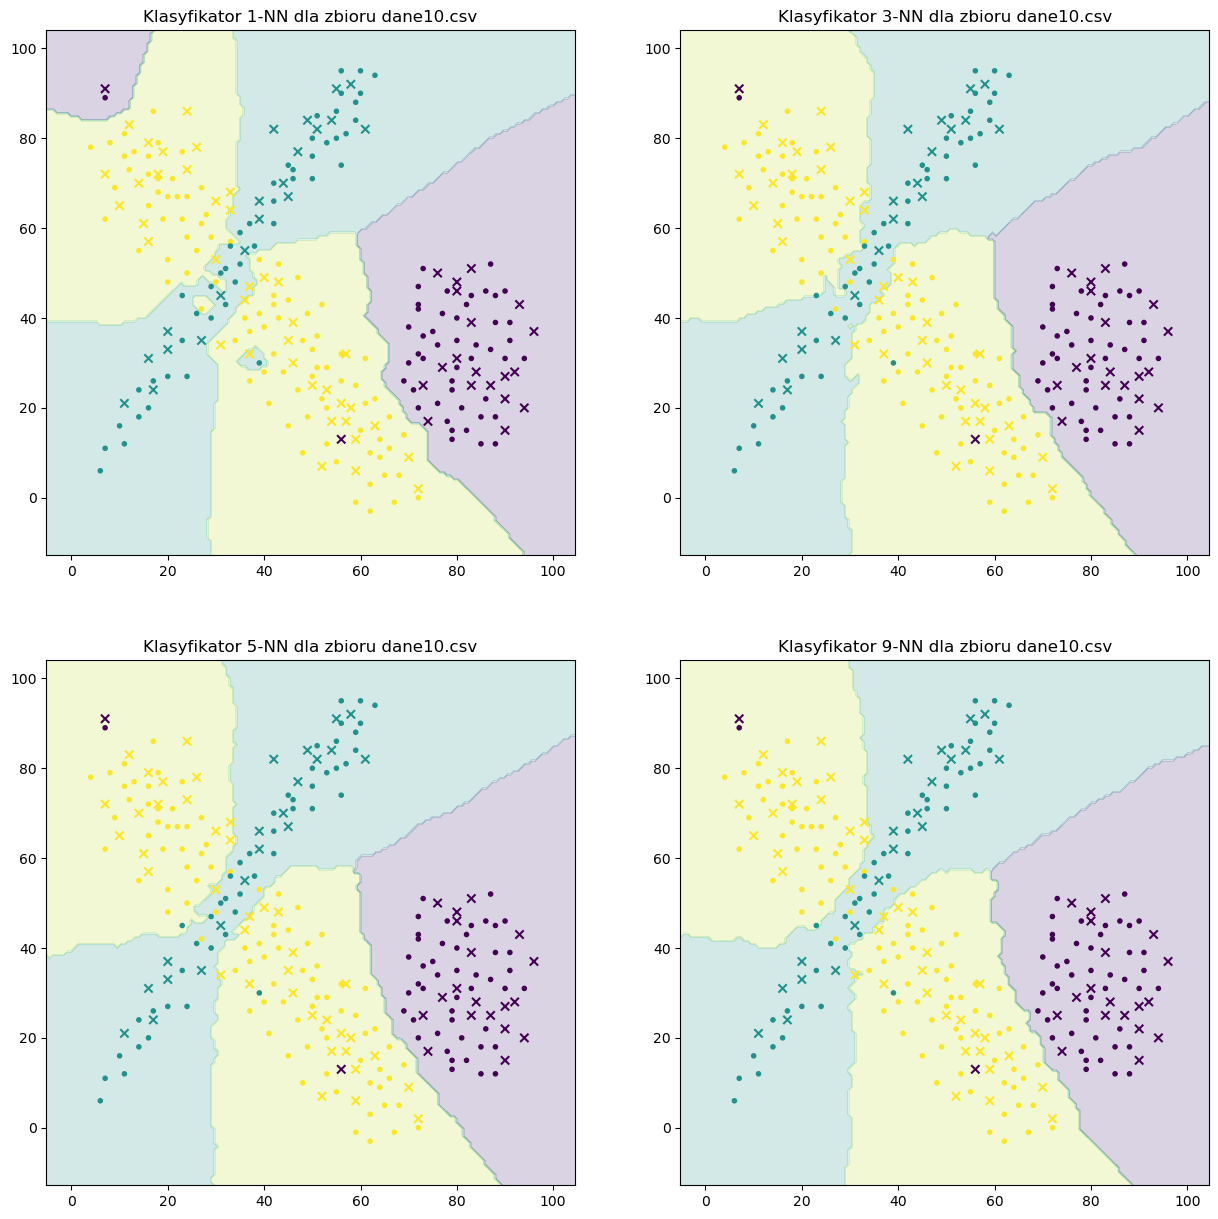

In [54]:
d1 = podziel(dane3,0.3)
d2 = podziel(dane10, 0.3)

granice_dla_KNN(d1,0,1,4, [1,3,5,9], "dane3.csv")
granice_dla_KNN(d2,0,1,4, [1,3,5,9], "dane10.csv")

Jak widać, zmiana liczby sąsiadów branych pod uwagę podczas klasyfikacji może zmienić przyporządkowanie. W połączeniu z wyborem zbioru uczącego, może się okazać że otrzymamy lepszą lub gorszą klasyfikację, w znaczeniu: będzie można zauważyć więcej lub mniej punktów jednej klasy, sklasyfikowanych jako inna klasa (należących do 'sektora' drugiej klasy).

> **Zadanie** Poeksperymentuj w analogiczny sposób z pozostałymi macierzami danych. Oceń przydatność klasyfikatora w każdym z przeanalizowanych przypadków.

In [55]:
# miejsce na kod

W celu doboru właściwej liczby sąsiadów (najczęściej nieparzystej) można wykonać analizę błędu klasyfikacji dla różnej liczby sąsiadów.

Text(0, 0.5, 'Prawdopodobienstwo bledu')

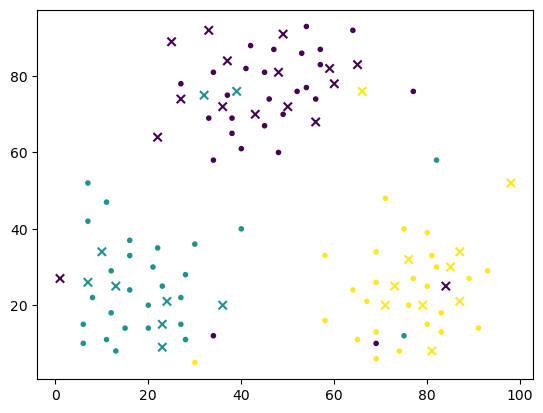

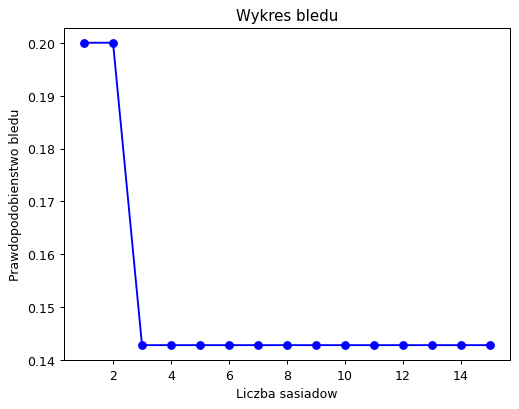

In [57]:
d = podziel(dane2,0.3)
granice(model,d,0,1,"",0)
kvals = range(1, 16)
rss_all = np.zeros(15)
for k in kvals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(d['opis_ucz'],d['dec_ucz'])
    predictions = model.predict(d['opis_test'])
    rss_all[k-1] = 1-model.score(d['opis_test'],d['dec_test'])
plt.figure(dpi=90)
plt.plot(kvals, rss_all,'bo-')
plt.title('Wykres bledu')
plt.xlabel('Liczba sasiadow')
plt.ylabel('Prawdopodobienstwo bledu')

> **Zadanie** Jak na podstawie powyższego wykresu określić optymalną liczbę sąsiadów ? Jak przebiega ten wykres dla różnych zbiorów danych (porównaj m.in. `dane2` i `dane3`) ? Skąd się biorą różnice w jego przebiegu ?

In [23]:
# miejsce na kod

> **Zadanie** Dobierz optymalną liczbę $k$ dla innych zbiorów danych.

In [24]:
# miejsce na kod

## 3. Metoda najbliższych prototypów

Klasyfikatory 1-NN i k-NN mają jedną poważną wadę - w celu klasyfikacji potrzeba korzystać z całego zbioru uczącego, co potrafi się stać bardzo czasochłonne dla dużych danych lub dużej liczby cech. Ponadto, często zachodzi konieczność przechowania całego zbioru w pamięci komputera.

Problem ten można rozwiązać poprzez wybranie, tudzież stworzenie, "najbardziej wzorowych" obiektów poszczególnych klas, i ograniczenie zbioru uczącego do zbioru składającego się z tych najlepszych reprezentantów - **prototypów klas**. Wtem podczas klasyfikacji rozpatrywany będzie jedynie zbiór prototypów, nie cały zbiór uczący. Taka metoda nosi nazwę **klasyfikacji najbliższego prototypu**.

Wartości atrybutów opisujących prototypu klasy najczęściej są wyznaczane jako miary tendencji centralnej klasy (patrz PRiAD 3 - Podstawowe miary danych). Najczęściej stosowana jest tu średnia arytmetyczna, która w tym przypadku nosi nazwę centroidu klasy. Więc w tym przypadku, podzbiory danych odpowiadające poszczególnym klasom są zastępowane przez centroidy tych klas.

macierz pomyłek - zbiór uczący, dokładność: 0.8987341772151899
0.8987341772151899
[[30  2  1]
 [ 2 18  1]
 [ 1  1 23]]
macierz pomyłek - zbiór testowy, dokładność: 0.9428571428571428
0.9428571428571428
[[ 9  0  1]
 [ 0 14  1]
 [ 0  0 10]]


G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestCentroid was fitted with feature names
  warnings.warn(


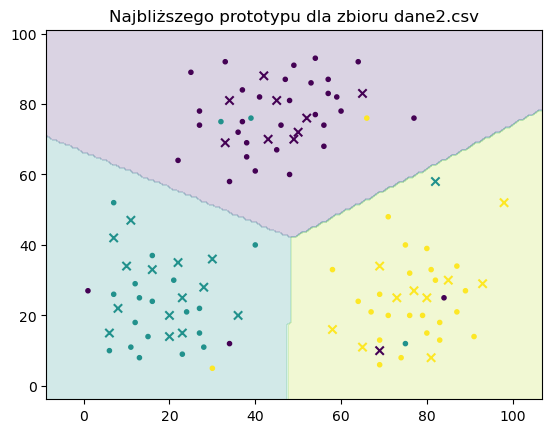

In [58]:
nazwa_pliku = 'dane2.csv'
# wczytanie badanego zbioru danych
df = pd.read_csv(nazwa_pliku)
# podział zbioru danych
d = podziel(df,0.3)
# zdefiniowanie modelu klasyfikatora
model = NearestCentroid()
# granice dycyzyjne
granice(model,d,0,1,"Najbliższego prototypu dla zbioru " + nazwa_pliku)
# weryfikacja
weryfikuj(model,d,[0,1])

> **Zadanie** Poeksperymentuj w analogiczny sposób z pozostałymi macierzami `dane`, w tym także ze zbiorem `iris`. Ocen przydatność klasyfikatora dla każdego zbioru danych.

In [26]:
# miejsce na kod

> **Pytania** 
> * Czy w przypadku klasyfikatora najblizszych prototypów zachodzi faza uczenia ? Jesli tak, to na czym polega ?
> * Jak zmierzyć stopień rozproszenia wartości atrybutu wokół wartości średniej ?

> **Zadanie**  Wykonaj klasyfikacje klasyfikatorem $k$-NN, dla różnych wartości $k$ oraz klasyfikatorem najbliższych prototypów. Wykonaj weryfikację wyników klasyfikacji na zbiorze uczącym i testowym dla każdego z trzech klasyfikatorów. Oceń wyniki. Zastanów się:
> * jak zinterpretować błędne wskazania klasyfikatora dla obiektów ze zbioru uczącego?
> * dlaczego może się zdarzyć tak, że nie wszystkie obiekty zbioru uczącego są poprawnie klasyfikowane? Na wykresie punktowym wskaż takie obiekty
> * czy – w tym konkretnym przypadku – niepoprawna klasyfikacja jest efektem pozytywnym czy negatywnym? O jakiej własności klasyfikatora ona świadczy?

In [27]:
# miejsce na kod

## 4. Naiwny klasyfikator Bayesa

Jak nazwa sugeruje, klasyfikator Bayesa opiera się na twierdzeniu Bayesa, które dotyczy prawdopodobieństw warunkowych:
$P(A|B) = \dfrac{P(B|A) * P(A)}{P(B)}$

W przypadku klasyfikacji, zdarzenia losowe A i B, brane pod uwagę przy wyznaczaniu prawdopodobieństw, odnoszą się do dwóch faktów związanych z rozpoznawanymi obiektami - posiadania przez dany obiekt zbioru wartości atrybutów opisujących (zapisanego zwykle w formie wektora) oraz przynależności tego obiektu do poszczególnych klas. Innymi słowy, zdarzenia losowe odnoszą się do cech obiektu oraz klasy obiektu - tych parametrów, na których operuje każdy algorytm klasyfikujący. 

Przynależność obiektów do poszczególnych klas jest określana dzięki **funkcji dyskryminacyjnej**. W tym przypadku, i-ta funkcja dyskryminacyjna obiektu (o wektorze atrybutów opisujacych) jest tożsama prawdopodobieństwu warunkowemu przynależności obiektu to i-tej klasy, pod warunkiem że obiekt posiada konkretne cechy. Oznacza to, że w praktyce badamy prawdopodobieństwo zależności między danym atrybutem opisującym a przynależnością do klasy.

Bardzo wygodnym założeniem jest brak zależności między poszczególnymi atrybutami opisującymi - dzięki temu możemy przyjąć, że badane zdarzenia losowe są niezależne od siebie. Klasyfikator nazwiemy Bayesowskim, gdy spełnia to założenie.

Gdy mamy do czynienia z atrybutami ilościowymi, prawdopodobieństwo musi być oszacowane za pomocą typowych rozkładów zmiennych losowych (np. rozkład Gaussa).

Poniżej wykorzystujemy naiwny klasyfikator Bayesa, szacujący prawdopobieństwo w oparciu rozkład Gaussa. 

macierz pomyłek - zbiór uczący, dokładność: 0.8482142857142857
0.8482142857142857
[[25  3  2]
 [ 3 43  1]
 [ 2  6 27]]
macierz pomyłek - zbiór testowy, dokładność: 0.7346938775510204
0.7346938775510204
[[13  1  2]
 [ 1 14  0]
 [ 0  9  9]]


G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


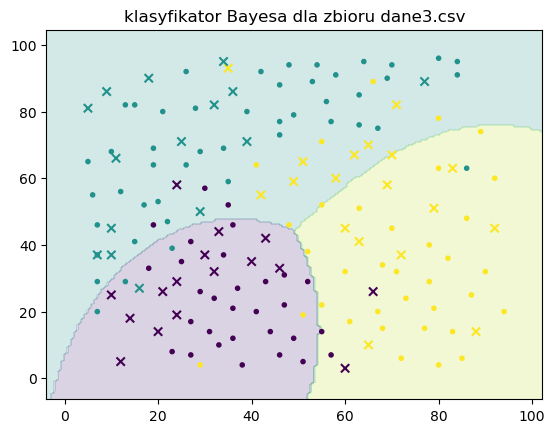

In [59]:
nazwa_pliku = 'dane3.csv'
# wczytanie badanego zbioru danych
df = pd.read_csv(nazwa_pliku)
# podział zbioru danych
d = podziel(df,0.3)
# zdefiniowanie modelu klasyfikatora
model = GaussianNB()
# granice dycyzyjne
granice(model,d,0,1,"klasyfikator Bayesa dla zbioru " + nazwa_pliku)
# weryfikacja
weryfikuj(model,d,[0,1])

## 5. Drzewa decyzyjne

**Drzewa decyzyjne** to struktury grafowe, które przedstawiają zależności między atrybutami obiektów w hierarchiczny sposób (jak to drzewa). Ta hierarchiczność sprawia, że drzewo nie tylko jest klasyfikatorem, ale pozwala nam analizować poszczególne atrybuty w klasyfikacji konkretnego zbioru danych.

W przypadku klasyfikacji za pomocą drzew decyzyjnych często trzeba zwracać uwagę na **przetrenowanie**, czyli utracenie zdolności generalizacji przez klasyfikator. Drzewo, w którym jest za dużo zbyt szczegółowych testów może stracić zdolność uogólnienia, co oznacza że skuteczna klasyfikacja zbioru uczącego nie musi przekładać się na dobre wyniki. 

Istnieją dwa sposoby rozwiązania problemu przetrenowania:
* wstrzymanie budowy drzewa zanim osiągnie maksymalne rozmiary;
* przycinanie drzewa maksymalnego po jego wyznaczeniu.


G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


macierz pomyłek - zbiór uczący, dokładność: 1.0
1.0
[[14  0  0]
 [ 0 16  0]
 [ 0  0 26]]
macierz pomyłek - zbiór testowy, dokładność: 1.0
1.0
[[10  0  0]
 [ 0  3  0]
 [ 0  0 11]]


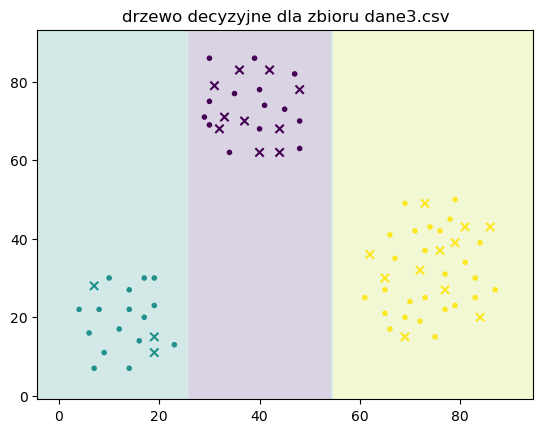

In [29]:
# podział zbioru danych
d = podziel(dane1,0.3)

# zdefiniowanie modelu klasyfikatora
model = tree.DecisionTreeClassifier(max_depth=4)

# granice dycyzyjne
granice(model,d,0,1,"drzewo decyzyjne dla zbioru " + nazwa_pliku)

# weryfikacja
weryfikuj(model,d,[0,1])

Drzewa o różnych głębokościach:

Ponownie zmodyfikujemy funkcję `granice` w celu lepszej wizualizacji:

In [60]:
def granice_dla_drzew(dane,atr_x, atr_y, liczba_sub, wart_zmienne, nazwa_pliku, kontur = 1):
    plt.figure(dpi = 100, figsize=(15,15))
    j = 0
    ls = int(ceil(liczba_sub/2))
    for i in wart_zmienne:
        model = tree.DecisionTreeClassifier(max_depth=i)
        model.fit(dane["opis_ucz"].iloc[:,[atr_x,atr_y]], dane["dec_ucz"])
        plt.subplot(ls, 2, j+1)
        j+=1
        plt.title("Klasyfikator dla drzewa o głębokości " + str(i)+ " dla zbioru " + nazwa_pliku)
        if (kontur == 1):
            xyz = rysujGranice(model, dane, atr_x, atr_y)
            plt.contourf(xyz[0], xyz[1], xyz[2], levels = 4, alpha=0.2)
        plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
        plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')

G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
G:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeCl

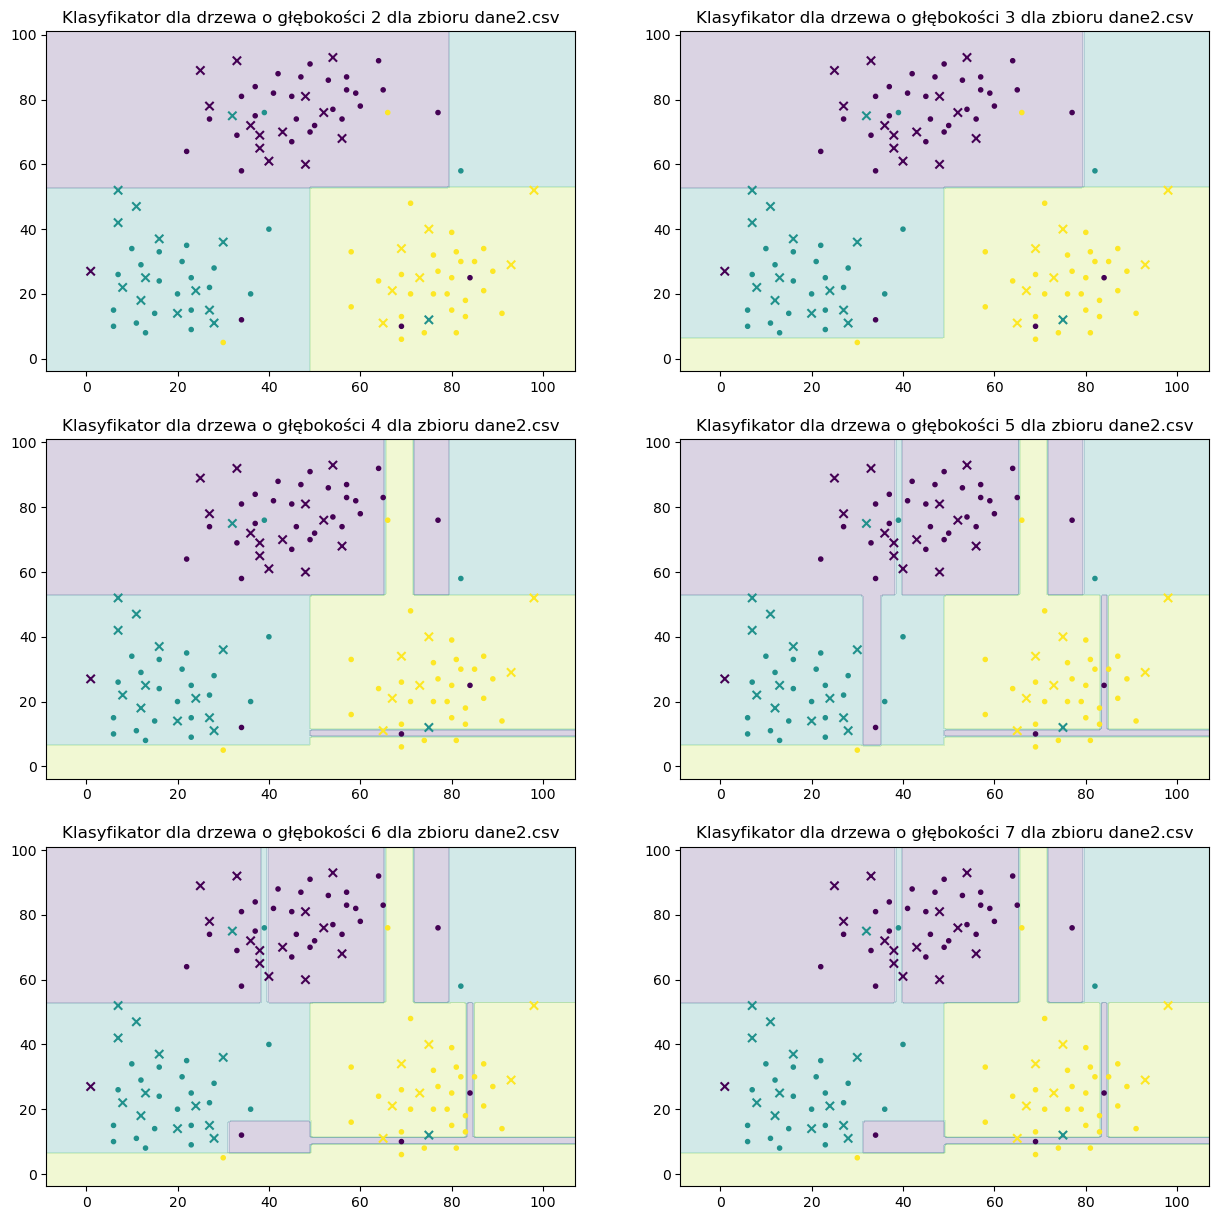

In [62]:
nazwa_pliku = 'dane2.csv'
# wczytanie badanego zbioru danych
df = pd.read_csv(nazwa_pliku)
# podział zbioru danych
d = podziel(df,0.3)

granice_dla_drzew(d,0,1,6, [2,3,4,5,6,7], nazwa_pliku)

 > **Zadanie** Utwórz drzewa decyzyjne dla innych zbiorów danych. Oceń przydatność otrzymanego klasyfikatora dla każdego zbioru danych.


> **Pytanie** Dla jakich danych konstrukcja drzew jest prostsza, a dla jakich – bardziej skomplikowana? Dlaczego tak się dzieje?Jak wielkość drzewa wpływa na skuteczność klasyfikacji?

In [32]:
# miejsce na kod

> **Zadanie** Poeksperymentuj z rożnymi klasyfikatorami na zbiorze `iris` o czterech atrybutach decyzyjnych, wybierając tylko dwa z nich. Zwróć uwagę na to, jak wybór dwóch z czterech atrybutów wpływa na wynik klasyfikacji. Wskaż najlepszą i najgorszą parę atrybutów z punktu widzenia poprawności klasyfikacji. Czy przy pomocy macierzy wykresów punktowych dla tego zbioru danych jesteś w stanie wskazać cechy rozkładu punktów, które potwierdzaja ten wybór? Porównaj wynik klasyfikacji dla najlepszej pary atrybutów z klasyfikacja z wykorzystaniem wszystkich czterech atrybutów.

In [33]:
# miejsce na kod

> **Zadanie** Przeanalizuj zbiór `dane20.csv`. Wykonaj stosowną wyzualizację danych. Określ, które atrybuty mają wpływ na przynależność obiektu do klasy, a które - nie. Przetestuj omówione klasyfikatory wykorzystując w klasyfikacji: 
> 1. wszystkie atrybuty
> 2. atrybuty wpływające na klasę obiektu
> 3. atrybuty niewpływające na klasę 
> 4. dowolną mieszankę obu rodzajów atrybutów

In [34]:
# miejsce na kod

## 6. Regresja liniowa

Jak opisano we wstępie, regresja dzięki regresji możemy oszacować jak dane atrybuty od siebie zależą.

Wpierw, zacznijmy od odpowiedzi na pytanie *czy* atrybuty od siebie zależą - pomoże nam w tym znana już miara korelacji (Pearsona). Wykorzystamy zbiór danych `iris`:

G:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


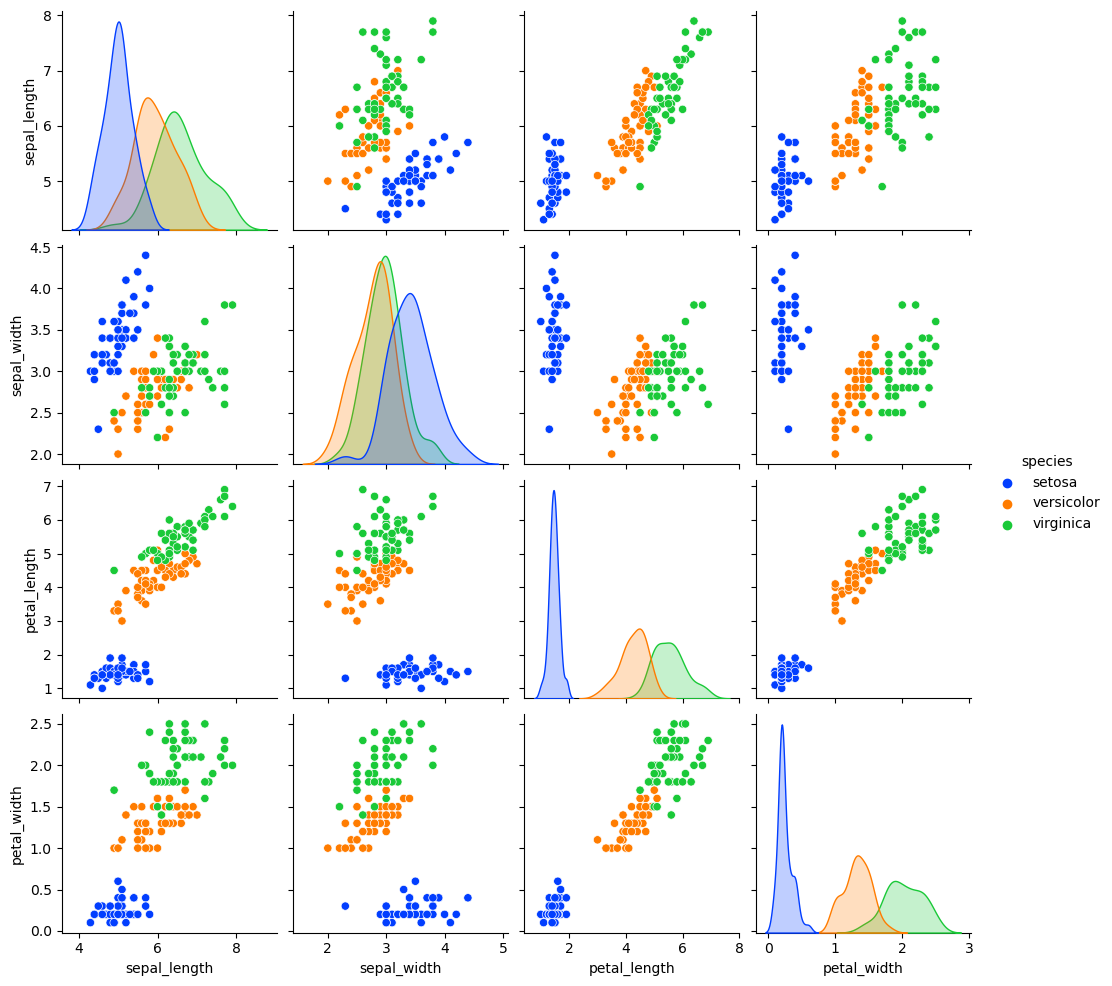

<Axes: >

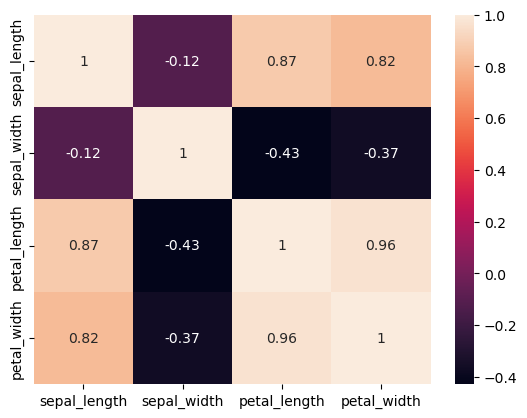

In [35]:
from seaborn import load_dataset
iris.head()
sns.pairplot(iris, kind="scatter", hue = "species", palette="bright")
plt.show()
iris_ns = iris.drop(columns = ["species"])
sns.heatmap(iris_ns.corr(),annot = iris_ns.corr())

Dzięki miarze korelacji Pearsona dowiedzieliśmy się *czy* dana para atrybutów jest od siebie zależna liniowo. Natomiast model regresyjny jest w stanie odpowiedzieć na pytanie *jak* one od siebie zależą. Wykorzystamy prostą regresję liniową, najprostszy model regresji wielomianowej. Jak nazwa wskazuje, jej wynikiem jest linia prosta, która pozwala na oszacowanie wartości atrybutu y na podstawie wartości atrybutu x.

Model prostej regresji liniowej wyznacza się wzorem:
$$\hat y = \hat{f}(x) = w_0 + w_1 \cdot x,$$

Wykorzystująć zbiór danych `iris`, stworzymy model regresji zależności atrybutu `sepal_length` (indeks 0), od `petal_width` (indeks 3). Heatmapa pokazuje nam, iż mają korelacje 0.82 - wysoką, więc są one dobrymi kandydatami do stworzenia modelu regresji.

W poniższym kodzie metoda `values` przetwarza ramkę danych do postaci wektora, `reshape` zmienia ten wektor na macierz o jednej kolumnie, a metoda `T` transponuje dla łatwiejszego zmieszczenia wydruku w oknie.

In [36]:
x = iris.iloc[:,0].values.reshape(-1,1)
y = iris.iloc[:,3].values.reshape(-1,1)
print(x.T)
print(y.T)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]]
[[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
  1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
  1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
  1.2 1.4 1

Teraz stworzymy model regresyjny:

In [37]:
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

Parametrami prostego modelu liniowego $\hat y = \hat{f}(x) = w_0 + w_1 \cdot x$ są $w_0$ (intercept, przecięcie z osią rzędnych) oraz $w_1$ (coefficient, współczynnik (nachylenie) ). W naszym modelu są one równe odpowiednio:

In [38]:
print("w0 =", regressor.intercept_[0])
print("w1 =", regressor.coef_[0][0])

w0 = -3.2002150046491904
w1 = 0.7529175706758455


Skoro już mamy parametry liniowe funkcji $\hat{f}$ modelu liniowego, czyli utworzyliśmy nasz model regresji, możemy go wykorzystać - wyznaczyć przewidywane wartości $y$ dla wektora $x$. Dla odróżnienia, zostaną zapisane w wektorze [$y_{pred}$].

In [39]:
y_pred = regressor.predict(x)
print(y_pred.T)

[[0.63966461 0.48908109 0.33849758 0.26320582 0.56437285 0.86553988
  0.26320582 0.56437285 0.11262231 0.48908109 0.86553988 0.41378933
  0.41378933 0.03733055 1.16670691 1.09141515 0.86553988 0.63966461
  1.09141515 0.63966461 0.86553988 0.63966461 0.26320582 0.63966461
  0.41378933 0.56437285 0.56437285 0.71495636 0.71495636 0.33849758
  0.41378933 0.86553988 0.71495636 0.94083163 0.48908109 0.56437285
  0.94083163 0.48908109 0.11262231 0.63966461 0.56437285 0.18791406
  0.11262231 0.56437285 0.63966461 0.41378933 0.63966461 0.26320582
  0.79024812 0.56437285 2.07020799 1.61845745 1.99491623 0.94083163
  1.6937492  1.09141515 1.54316569 0.48908109 1.76904096 0.71495636
  0.56437285 1.24199866 1.31729042 1.39258218 1.01612339 1.84433272
  1.01612339 1.16670691 1.46787393 1.01612339 1.24199866 1.39258218
  1.54316569 1.39258218 1.61845745 1.76904096 1.91962448 1.84433272
  1.31729042 1.09141515 0.94083163 0.94083163 1.16670691 1.31729042
  0.86553988 1.31729042 1.84433272 1.54316569 1.

Zwizualizujemy dane i regresję liniową:

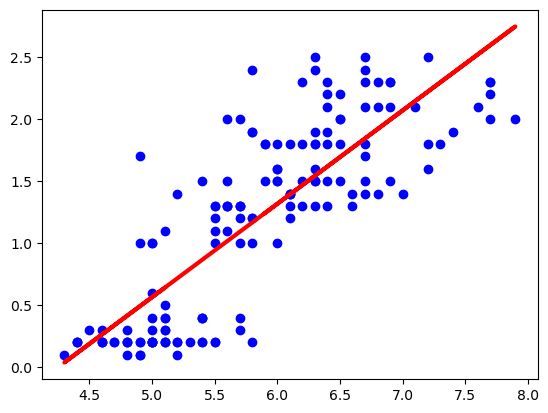

In [40]:
plt.scatter(x,y, color = 'blue')
plt.plot(x, y_pred, color = 'red', linewidth=3)
plt.show()

Na powyższym wykresie mamy przedstawioną zależność między rozmieszczeniem oryginalnych danych (niebieskie punkty), a regresją liniową stworzoną na ich podstawie (czerwona prosta).

Oczywiście możemy ocenić jakość naszego modelu. Wykorzystamy do tego **współczynnik determinacji $R^2$**, wyznaczany wzorem:

$$R^2 = \frac{\sum_{i=1}^{n} (\hat y_i - \bar y)^2}{\sum_{i=1}^{n} (y_i - \bar y)^2}$$ 
<br> gdzie $ \hat y$ to wartość atrybutu przewidziana przez model, $y$ to wartość faktyczna atrubyty, $\bar y$ to wartość średnia atrybutu $y$ w zbiorze danych.


Suma w liczniku zbioru określa zmienność wyznaczanych wielkości $\hat y_i$, a w mianowniku - zmienność obserwowanych wartości $y_i$. Możemy zatem wywnioskować, że współczynnik $R^2$ określa **w jakim stopniu model "wyjaśnia" kształtowanie się wartości zmiennej $y$** (w skali od 0 do 1). Innymi słowy, jest to miara która mówi nam jak dokładny (procentowo) jest nasz model w porównaniu z oryginalnymi danymi.

Wyznaczmy współczynnik $R^2$ dla naszego modelu. Wykorzystamy w tym celu funkcję `r2_score` z biblioteki `sklearn.metrics`. Funkcja ta zwraca wartość poszukiwanego $R^2$ dla podanych wektorów: 

In [41]:
from sklearn.metrics import r2_score

Rsq = r2_score(y.T[0], y_pred.T[0])
# gdy dokładnie przyjżymy się y.T i y_pred.T zauważymy, 
#   że są to jednoelementowe wektory zawierające jedną,
#   wieloelementową tablicę - [ [...] ]
#   więc bierzemy ten pierwszy element

print("Współczynnik determinacji jest równy", Rsq)

Współczynnik determinacji jest równy 0.6690276860464136


Jak widać, na podstawie naszego modelu regresji jesteśmy w stanie wyjaśnić ukształtowanie ok. 2/3 danych występujących w zbiorze danych, znając tylko jeden z dwóch analizowanych atrybutów na wejściu (Przypomnienie: ten model regresji wyznacza przewidziane wartości `sepal_width` na podstawie wartości `petal_length`). Możliwość wyjaśnienia ukształtownia danych przekłada się, oczywiście, na możliwość odtworzenia tych danych, co poniekąd jest celem naszej regresji.

Połączmy te kroki w jedną funkcję:

In [42]:
def regresja(dane, atr_x, atr_y, rysuj = 1):
    rg = LinearRegression()
    x = dane.iloc[:,atr_x].values.reshape(-1,1)
    y = dane.iloc[:,atr_y].values.reshape(-1,1)
    rg.fit(x, y)
    y_p = rg.predict(x)
    if(rysuj == 1):
        plt.scatter(x,y, color='blue')
        plt.plot(x, y_p, color='red', linewidth=3)
        plt.show()
    Rsq = r2_score(y.T[0], y_p.T[0])
    return rg.intercept_[0], rg.coef_[0][0], Rsq 


<br><br>
Stworzymy teraz model regresyjny zależności atrybutu `sepal_width` od `sepal_length` (indeks 0 od indeksu 1) oraz zbadamy jego współczynnik determinacji. Według powyższej heatmapy, ich korelacja jest równa -0.12 - o wiele niższa niż poprzednia para.

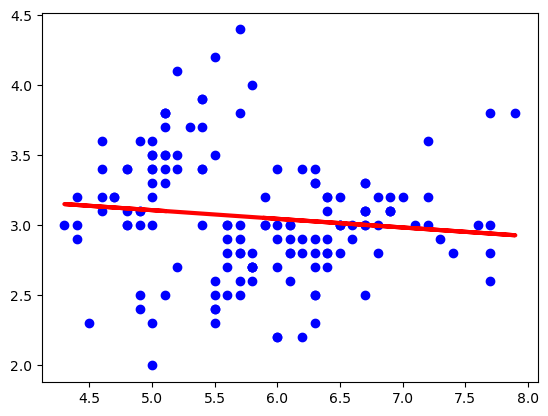

Współczynnik determinacji = 0.013822654141080748


In [43]:
w0, w1, Rsq = regresja(iris, 0, 1)
print("Współczynnik determinacji =", Rsq)


Jak widać, współczynnik determinacji w tym przykładzie jest rzędu jednego procenta - możemy wyjaśnić około jedną setną rozmieszczenia naszych danych za pomocą tego modelu. 

Wynika z tego prosty wniosek: z małą korelacją między atrybutami mamy drastycznie małą jakość modelu regresji. Innymi słowy, **im większa korelacja między badanymi atrybutami, tym lepsza będzie predykcja jednego z tych atrybutów na podstawie drugiego** (lepszy model regresji).

> **Zadanie** Korzystając z powyższej funkcji oceń modele regresyjne dla poszczególnych par atrybutów. Dla których par współczynnik determinacji modelu jest największy, a dla których - najmniejszy?

In [44]:
# miejsce na kod

Podobnie jak w przypadku modeli klasyfikacji, skuteczność modelu regresyjnego możemy sprawdzić za pomocą podiału referencyjnego zbioru danych - w najprostszym przypadku ponownie na zbiór uczący i testowy. Analogicznie, zbiór uczący wyznaczymy do stworzenia modelu - wyznaczenia parametrów funkcji regresyjnej, a drugi - do przetestowania naszego modelu. 

Jakość modelu możemy również ocenić na podstawie błędu, dla przykładu błędu średniokwadratowego. Jest to wariancja z danych w naszym modelu.

Błąd przewidzenia (predykcji) dla zbioru uczącego określa stopień dopasowania modelu do znanych danych. Błąd przewidzenia dla zbioru testowego określa przydatność modelu do przewidywania dla danych, których nie wykorzystano w procesie uczenia. Ten drugi pokazuje nam na ile możemy uznać model za ogólny, tj. sprawdzający się dla dowolnych danych, stąd też inna nazwa - błąd generalizacji.

Ten błąd wyznaczymy jako błąd średniokwadratowy

Dane w zbiorze `dane10` charakteryzują sie dwoma atrybutami opisującymi należącymi do trzech klas. Każda z tych klas definiuje jeden podzbiór danych. Te podzbiory wykorzystamy do badania modeli regresyjnych.

G:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


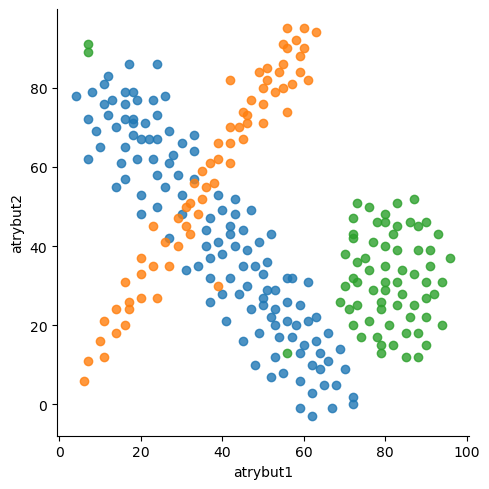

In [45]:
sns.lmplot( x="atrybut1", y="atrybut2", data=dane10, fit_reg=False, hue='klasa', legend=False)

Wybierzemy podzbiór *klasa 3* i wygenerujemy model liniowy:

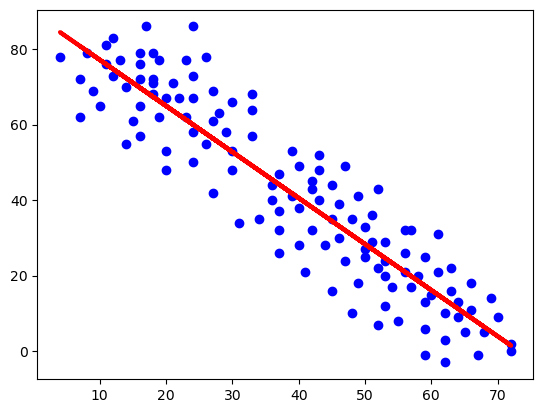

In [46]:
dd = dane10[dane10.klasa == 'klasa 3']

rg = LinearRegression()
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
rg.fit(x, y)
y_pred = rg.predict(x)

plt.scatter(x,y, color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

> **Zadanie** Obejrzyj modele dla podzbiorów należących do innych klas. Zwróć szczególną uwage na klasę nr 1.

Teraz wykonamy model regresji z podziałem na zbiór uczący i testowy:

In [47]:
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

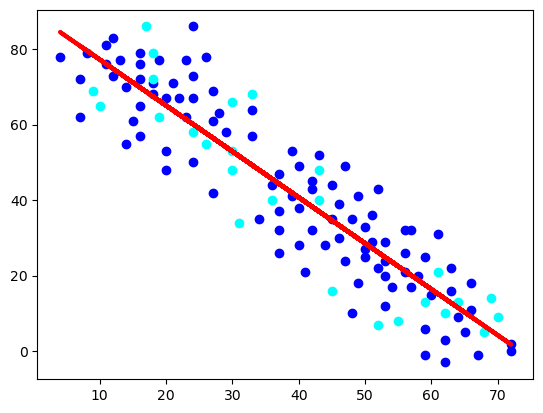

Błąd uczenia jest równy 97.90961693115158
Współczynnik determinacji dla zbioru uczenia jest równy 0.8303615440345252
Błąd generalizacji jest równy 109.05710100604445
Współczynnik determinacji dla zbioru testowego jest równy 0.8352335629818588


In [48]:
regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz)

# zbiór uczący
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
Rsq_ucz = r2_score(y_ucz, y_pred_ucz)

# zbiór testowy
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
Rsq_test = r2_score(y_test, y_pred_test)

plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='cyan')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('Błąd uczenia jest równy', e_ucz)
print('Współczynnik determinacji dla zbioru uczenia jest równy', Rsq_ucz)
print('Błąd generalizacji jest równy', e_test)
print('Współczynnik determinacji dla zbioru testowego jest równy', Rsq_test)

> **Zadanie** Zbadaj błąd uczenia i generalizacji dla wszystkich trzech klas, dla każdej kilkukrotnie powtarzając podział zbioru na uczący i testowy. Oceń stabilość modeli tj. zmienność parametrów modelu dla różnych podziałów:
> * Dla których klas uzyskane modele sa bardziej, a dla których mniej stabilne?
> * Co może być tego przyczyną?